In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("../data/preprocessed_data.csv")
df.head()


,categoryId,view_count,likes,dislikes,comment_count,channel_age,image_popularity,days_uploaded
0,22,1514614.0,156908.0,696.438236,35313,1958,1,1
1,20,2381688.0,146739.0,1095.129578,16549,566,1,1
2,24,2038853.0,353787.0,937.489807,40221,4918,3,1
3,10,496771.0,23251.0,228.421445,7647,5088,1,1
4,26,1123889.0,45802.0,516.778052,2196,4004,1,1


In [3]:
scaler = StandardScaler()

columns_to_standardize = ['view_count','likes','dislikes','comment_count','channel_age','days_uploaded']

df[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])

df.head()


,categoryId,view_count,likes,dislikes,comment_count,channel_age,image_popularity,days_uploaded
0,22,-0.136989,0.056358,-0.125183,0.330958,-0.688309,1,-1.251756
1,20,-0.033044,0.033416,-0.035790,0.081891,-1.486624,1,-1.251756
2,24,-0.074143,0.500524,-0.071136,0.396105,1.009258,3,-1.251756
3,10,-0.259007,-0.245177,-0.230119,-0.036271,1.106753,1,-1.251756
4,26,-0.183829,-0.194302,-0.165466,-0.108625,0.485077,1,-1.251756


In [4]:
features = ['categoryId', 'view_count', 'dislikes', 'comment_count', 'image_popularity', 'days_uploaded']
target = 'likes'

In [5]:
X = df[features]
X

,categoryId,view_count,dislikes,comment_count,image_popularity,days_uploaded
0,22,-0.136989,-0.125183,0.330958,1,-1.251756
1,20,-0.033044,-0.035790,0.081891,1,-1.251756
2,24,-0.074143,-0.071136,0.396105,3,-1.251756
3,10,-0.259007,-0.230119,-0.036271,1,-1.251756
4,26,-0.183829,-0.165466,-0.108625,1,-1.251756
...,...,...,...,...,...,...
245898,23,-0.251017,-0.223248,-0.113590,1,1.193371
245899,20,-0.025983,-0.029718,-0.060416,1,1.193371
245900,17,-0.261697,-0.260780,-0.133221,2,0.785850
245901,24,-0.222136,-0.198410,-0.111599,1,0.785850


In [6]:
y = df[target]
y

0         0.056358
1         0.033416
2         0.500524
3        -0.245177
4        -0.194302
            ...   
245898   -0.142153
245899   -0.040171
245900   -0.284705
245901   -0.230989
245902   -0.176955
Name: likes, Length: 245903, dtype: float64

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, shuffle=False, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((196722, 6), (49181, 6), (196722,), (49181,))

In [8]:
model = LinearRegression()

model.fit(X_train[features], y_train)


LinearRegression()

In [9]:
pred_train = model.predict(X_train[features])
pred_test = model.predict(X_test[features])

pred_train, pred_test


(array([ 0.05289508,  0.06204107,  0.10082474, ..., -0.13519927,
        -0.12583864, -0.12538145]),
 array([-0.19974387, -0.16299713, -0.15513593, ..., -0.26014126,
        -0.24001995, -0.27148243]))

In [10]:
print(f"Train RMSLE = {np.sqrt(mean_squared_error(y_train, pred_train))}")
print(f"Test RMSLE = {np.sqrt(mean_squared_error(y_test, pred_test))}")

Train RMSLE = 0.39102687851234963
Test RMSLE = 0.4408846382838667


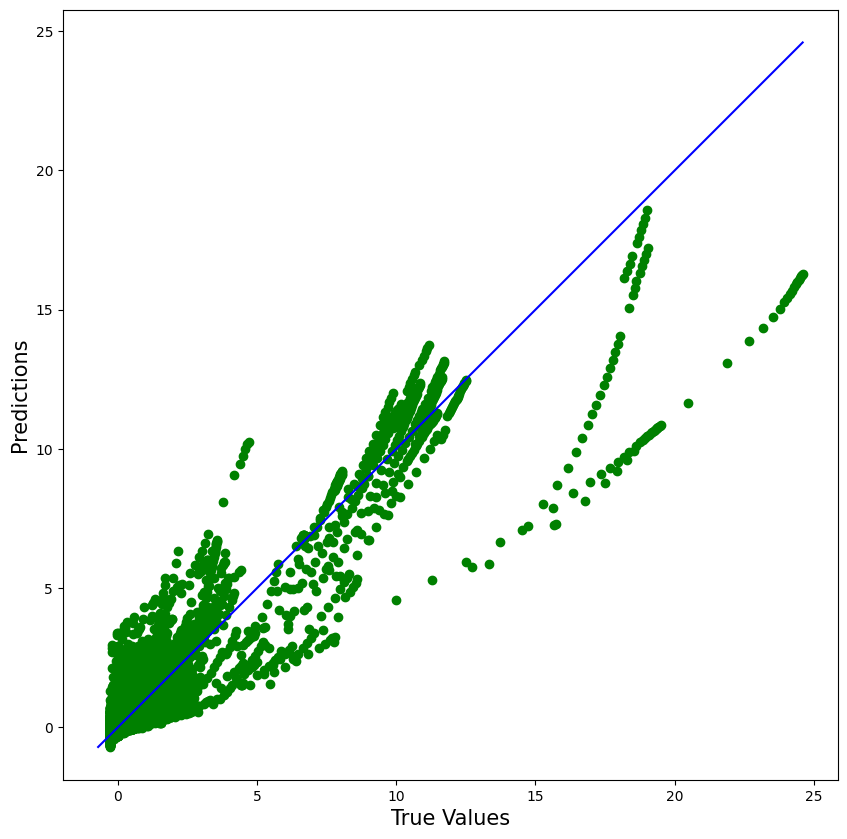

In [18]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, pred_test, c='green')

p1 = max(max(pred_test), max(y_test))
p2 = min(min(pred_test), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()